In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [11]:
path = 'dataset-grades'
filename = 'qb_grades.csv'

df_og = pd.read_csv(os.path.join(path, filename))

In [12]:
path = 'dataset-grades'
filename = 'qb_grades.csv'

df = pd.read_csv(os.path.join(path, filename))
df.head(3)

,Player,Year,Race,Report_Count,Mental_Count,Mental_Positive,Mental_Negative,Mental_Net,Athleticism_Count,Athleticism_Positive,...,Technique_Negative,Technique_Net,NaturalTalent_Count,NaturalTalent_Positive,NaturalTalent_Negative,NaturalTalent_Net,FootballIntelligence_Count,FootballIntelligence_Positive,FootballIntelligence_Negative,FootballIntelligence_Net
0,Chris Leak,2007,Non-White,10,2,0.5,0.5,0.0,3,1.000000,...,0.0,0.0,4,0.25,0.75,-0.5,1,1.0,0.0,1.0
1,John Beck,2007,White,12,2,1.0,0.0,1.0,2,0.000000,...,0.0,1.0,2,1.00,0.00,1.0,2,1.0,0.0,1.0
2,Drew Stanton,2007,White,13,3,1.0,0.0,1.0,7,0.571429,...,1.0,-1.0,1,1.00,0.00,1.0,1,1.0,0.0,1.0


In [13]:
""" GRADING SYSTEM

'Mental'
	'Leadership_Negative', 'Leadership_Positive', 'Competitor_Negative', 'Competitor_Positive', 
        'Toughness_Negative', 'Toughness_Positive', 'Clutch_Negative', 'Clutch_Positive', 
        'Confidence_Negative', 'Confidence_Positive', 'CharacterIssues'

'Athleticism'
	'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',
        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns'

'Tecnique'
	'Release_Negative', 'Release_Positive', 'Mechanics_Negative', 'Mechanics_Positive',
        'Footwork_Negative', 'Footwork_Positive', 'Accuracy_Negative', 'Accuracy_Positive'

'Natural_Talent'
        'Armstrength_Negative', 'Armstrength_Positive', 'PlayMaker_Negative', 'PlayMaker_Positive', 
	'Improvisation_Negative', 'Improvisation_Positive', 'Rare_Gifted_Negative', 'Rare_Gifted_Positive', 

'Football_Intelligence'
	'FootballIQ_Negative', 'FootballIQ_Positive', 'Decision_Making_Negative', 'Decision_Making_Positive', 
        'ReadingDefense_Negative', 'ReadingDefense_Positive', 'Progressions_Negative', 'Progressions_Positive',
	'PocketPresence_Negative', 'PocketPresence_Positive' """

" GRADING SYSTEM\n\n'Mental'\n\t'Leadership_Negative', 'Leadership_Positive', 'Competitor_Negative', 'Competitor_Positive', \n        'Toughness_Negative', 'Toughness_Positive', 'Clutch_Negative', 'Clutch_Positive', \n        'Confidence_Negative', 'Confidence_Positive', 'CharacterIssues'\n\n'Athleticism'\n\t'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',\n        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns'\n\n'Tecnique'\n\t'Release_Negative', 'Release_Positive', 'Mechanics_Negative', 'Mechanics_Positive',\n        'Footwork_Negative', 'Footwork_Positive', 'Accuracy_Negative', 'Accuracy_Positive'\n\n'Natural_Talent'\n        'Armstrength_Negative', 'Armstrength_Positive', 'PlayMaker_Negative', 'PlayMaker_Positive', \n\t'Improvisation_Negative', 'Improvisation_Positive', 'Rare_Gifted_Negative', 'Rare_Gifted_Positive', \n\n'Football_Intelligence'\n\t'FootballIQ_Negative', 'FootballIQ_Positive', 'Decision_Making_Negati

In [14]:
# Create Overall Score
df['Overall_Net'] = ((df['Mental_Net'] * df['Mental_Count']) + (df['Athleticism_Net'] * df['Athleticism_Count']) + (df['Technique_Net'] * df['Technique_Count']) + (df['NaturalTalent_Net'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Net'] * df['FootballIntelligence_Count'])) / df['Report_Count']
df['Overall_Positive'] = ((df['Mental_Positive'] * df['Mental_Count']) + (df['Athleticism_Positive'] * df['Athleticism_Count']) + (df['Technique_Positive'] * df['Technique_Count']) + (df['NaturalTalent_Positive'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Positive'] * df['FootballIntelligence_Count'])) / df['Report_Count']
df['Overall_Negative'] = ((df['Mental_Negative'] * df['Mental_Count']) + (df['Athleticism_Negative'] * df['Athleticism_Count']) + (df['Technique_Negative'] * df['Technique_Count']) + (df['NaturalTalent_Negative'] * df['NaturalTalent_Count']) + (df['FootballIntelligence_Negative'] * df['FootballIntelligence_Count'])) / df['Report_Count']

In [15]:
df = df.sort_values('Overall_Net', ascending=False).head(75).reset_index(drop=True)

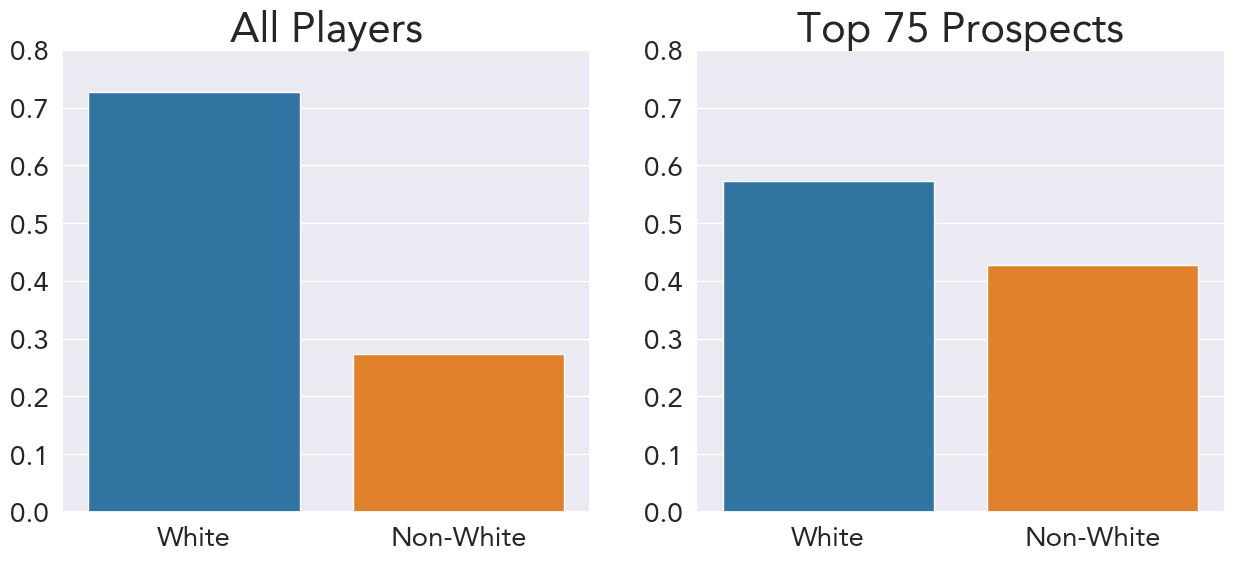

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.rcParams['font.family'] = 'Avenir'
yticks = np.arange(0, 0.81, 0.1)

ax = axs[0]
y = df_og['Race'].value_counts() / len(df_og)
sns.set(font='Avenir', font_scale=1.5)
sns.barplot(x=y.index, y=y, palette=['tab:blue', 'tab:orange'], ax=ax).set_title('All Players', fontsize=30)
ax.set_yticks(yticks)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('')

ax = axs[1]
y = df['Race'].value_counts() / len(df)
sns.set(font='Avenir', font_scale=1.5)
sns.barplot(x=y.index, y=y, palette=['tab:blue', 'tab:orange'], ax=ax).set_title('Top 75 Prospects', fontsize=30)
ax.set_yticks(yticks)
ax.tick_params(axis='both', labelsize=20)
ax.set_ylabel('')

plt.show()

In [6]:
# Separate White and Non-White Players
w = df[df['Race'] == 'White']
nw = df[df['Race'] == 'Non-White']

In [7]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Mental_Net' : [df['Mental_Net'].mean(), w['Mental_Net'].mean(), nw['Mental_Net'].mean()],
     'Athleticism_Net' : [df['Athleticism_Net'].mean(), w['Athleticism_Net'].mean(), nw['Athleticism_Net'].mean()],
     'Technique_Net' : [df['Technique_Net'].mean(), w['Technique_Net'].mean(), nw['Technique_Net'].mean()],
     'NaturalTalent_Net' : [df['NaturalTalent_Net'].mean(), w['NaturalTalent_Net'].mean(), nw['NaturalTalent_Net'].mean()],
     'FootballIntelligence_Net' : [df['FootballIntelligence_Net'].mean(), w['FootballIntelligence_Net'].mean(), nw['FootballIntelligence_Net'].mean()],
     'Overall_Net' : [df['Overall_Net'].mean(), w['Overall_Net'].mean(), nw['Overall_Net'].mean()]}

df_net = pd.DataFrame(d)
df_net = df_net[['Title', 'Mental_Net', 'Overall_Net', 'Athleticism_Net', 'Technique_Net', 'FootballIntelligence_Net', 'NaturalTalent_Net']]
df_net

,Title,Mental_Net,Overall_Net,Athleticism_Net,Technique_Net,FootballIntelligence_Net,NaturalTalent_Net
0,Average QB,0.730418,0.672839,0.644555,0.607519,0.633110,0.589089
1,Average White QB,0.757881,0.671661,0.525519,0.670805,0.735766,0.542152
2,Average Non-White QB,0.693513,0.674423,0.804510,0.522478,0.495166,0.652159


In [8]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Mental_Positive' : [df['Mental_Positive'].mean(), w['Mental_Positive'].mean(), nw['Mental_Positive'].mean()],
     'Athleticism_Positive' : [df['Athleticism_Positive'].mean(), w['Athleticism_Positive'].mean(), nw['Athleticism_Positive'].mean()],
     'Technique_Positive' : [df['Technique_Positive'].mean(), w['Technique_Positive'].mean(), nw['Technique_Positive'].mean()],
     'NaturalTalent_Positive' : [df['NaturalTalent_Positive'].mean(), w['NaturalTalent_Positive'].mean(), nw['NaturalTalent_Positive'].mean()],
     'FootballIntelligence_Positive' : [df['FootballIntelligence_Positive'].mean(), w['FootballIntelligence_Positive'].mean(), nw['FootballIntelligence_Positive'].mean()],
     'Overall_Positive' : [df['Overall_Positive'].mean(), w['Overall_Positive'].mean(), nw['Overall_Positive'].mean()]}

df_pos = pd.DataFrame(d)
df_pos = df_pos[['Title', 'Mental_Positive', 'Overall_Positive', 'Athleticism_Positive', 'Technique_Positive', 'FootballIntelligence_Positive', 'NaturalTalent_Positive']]
df_pos

,Title,Mental_Positive,Overall_Positive,Athleticism_Positive,Technique_Positive,FootballIntelligence_Positive,NaturalTalent_Positive
0,Average QB,0.805209,0.836420,0.815611,0.803760,0.796555,0.774544
1,Average White QB,0.820801,0.835831,0.751132,0.835403,0.867883,0.759448
2,Average Non-White QB,0.784257,0.837211,0.902255,0.761239,0.700708,0.794829


In [9]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'Mental_Negative' : [df['Mental_Negative'].mean(), w['Mental_Negative'].mean(), nw['Mental_Negative'].mean()],
     'Athleticism_Negative' : [df['Athleticism_Negative'].mean(), w['Athleticism_Negative'].mean(), nw['Athleticism_Negative'].mean()],
     'Technique_Negative' : [df['Technique_Negative'].mean(), w['Technique_Negative'].mean(), nw['Technique_Negative'].mean()],
     'NaturalTalent_Negative' : [df['NaturalTalent_Negative'].mean(), w['NaturalTalent_Negative'].mean(), nw['NaturalTalent_Negative'].mean()],
     'FootballIntelligence_Negative' : [df['FootballIntelligence_Negative'].mean(), w['FootballIntelligence_Negative'].mean(), nw['FootballIntelligence_Negative'].mean()],
     'Overall_Negative' : [df['Overall_Negative'].mean(), w['Overall_Negative'].mean(), nw['Overall_Negative'].mean()]}

df_neg = pd.DataFrame(d)
df_neg = df_neg[['Title', 'Mental_Negative', 'Overall_Negative', 'Athleticism_Negative', 'Technique_Negative', 'FootballIntelligence_Negative', 'NaturalTalent_Negative']]
df_neg

,Title,Mental_Negative,Overall_Negative,Athleticism_Negative,Technique_Negative,FootballIntelligence_Negative,NaturalTalent_Negative
0,Average QB,0.074791,0.163580,0.171056,0.196240,0.163445,0.185456
1,Average White QB,0.062920,0.164169,0.225612,0.164597,0.132117,0.217296
2,Average Non-White QB,0.090743,0.162789,0.097745,0.238761,0.205542,0.142671


In [10]:
categories_net = ['Mental_Net', 'Overall_Net', 'Athleticism_Net', 'Tecnique_Net', 'FootballIntelligence_Net', 'NaturalTalent_Net']
categories_pos = ['Mental_Positive', 'Overall_Positive', 'Athleticism_Positive', 'Tecnique_Positive', 'FootballIntelligence_Positive', 'NaturalTalent_Positive']
categories_neg = ['Mental_Negative', 'Overall_Negative', 'Athleticism_Negative', 'Tecnique_Negative', 'FootballIntelligence_Negative', 'NaturalTalent_Negative']

In [11]:
categories = ['Mental', 'Overall', 'Athleticism', 'Technique', 'FootballIntelligence', 'NaturalTalent']

In [12]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories_net) + 1) + offset

In [13]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, categories, color='#003594', title='', title_flag=False):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=40)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add Title
    ax.text(np.pi/2, 1.4, player_data[0], ha='center', va='center', size=50, color=color)
    
    if title_flag:
        ax.text(np.pi/2, 1.70, title, ha='center', va='center', size=55)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

def get_row_data(data, row):
    return np.asarray(data[data['Title'] == row])[0]

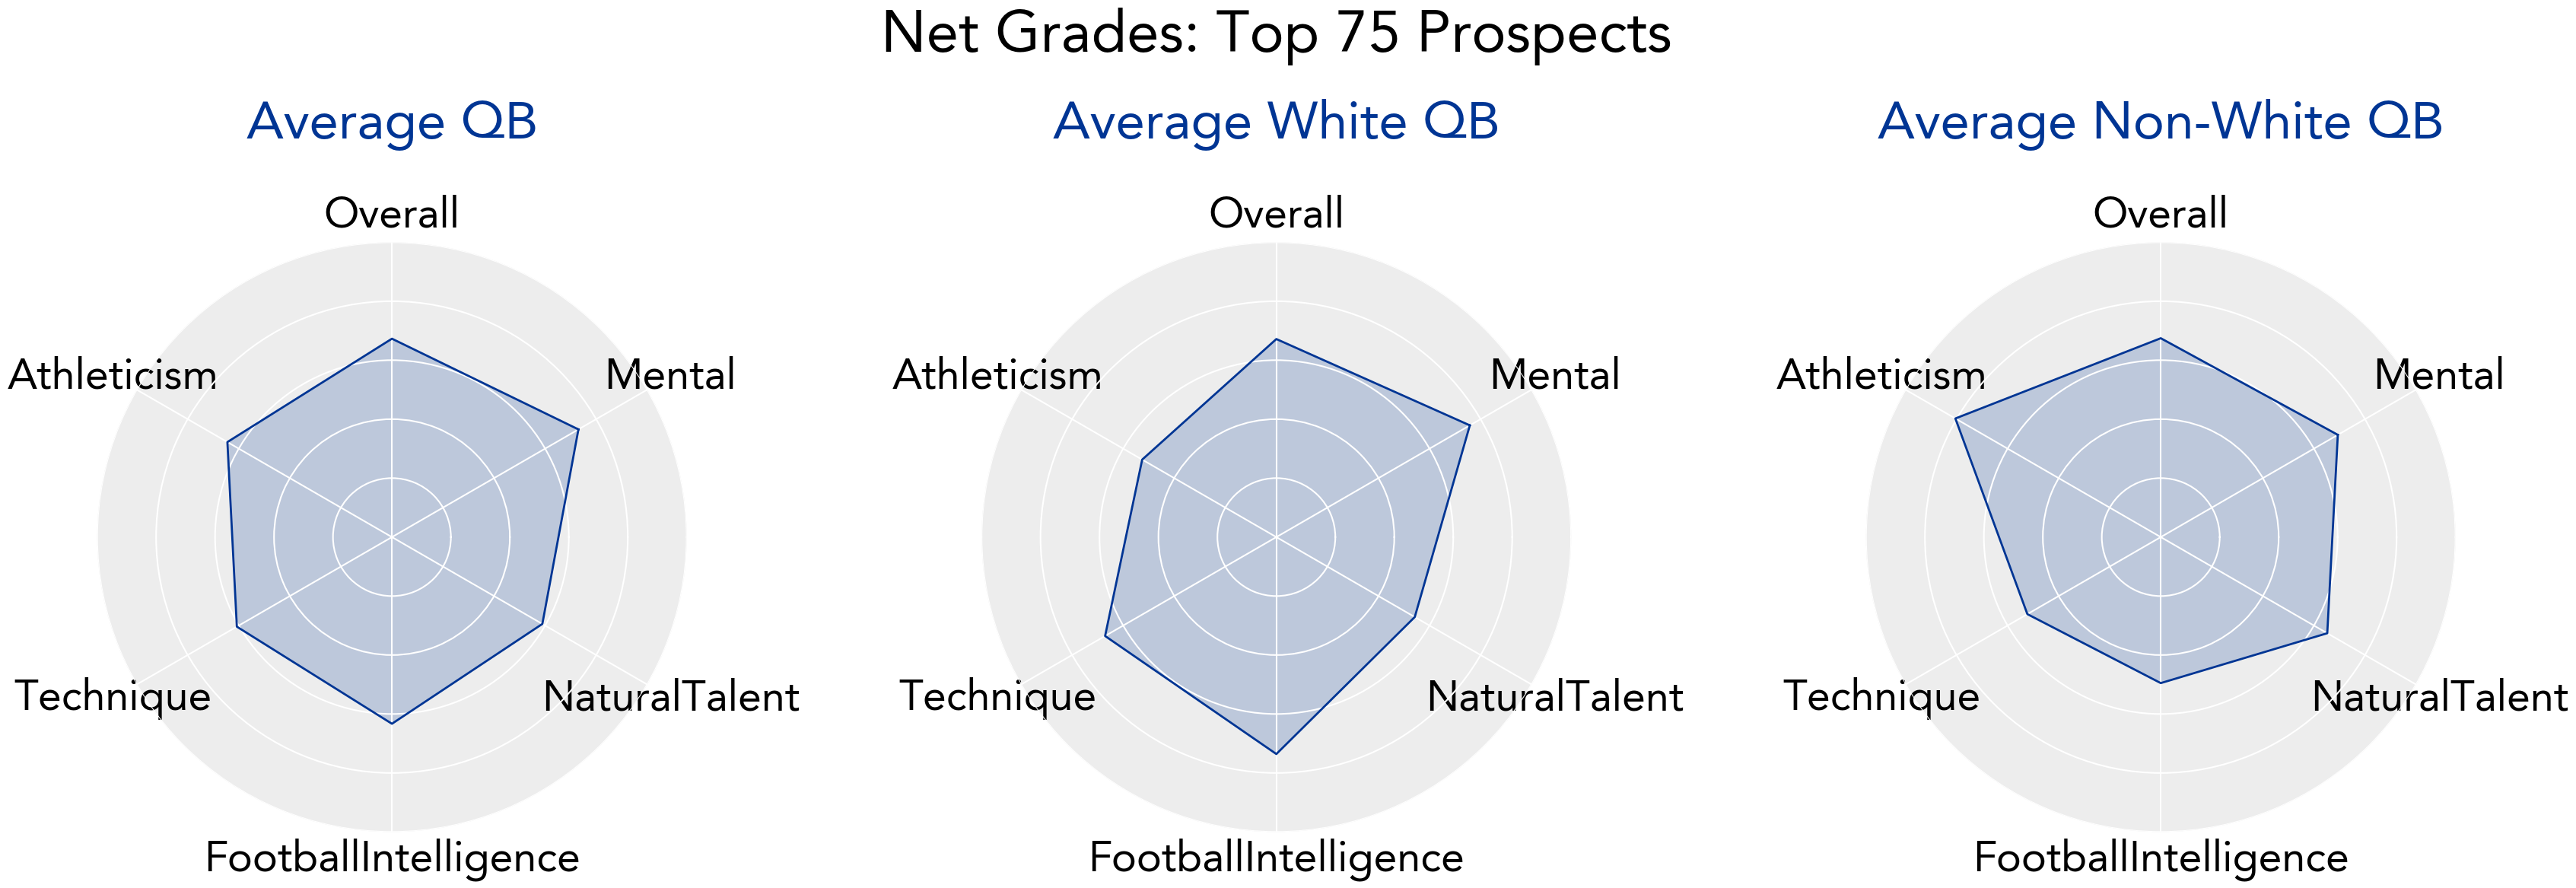

In [14]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_net, 'Average QB')
w_data = get_row_data(df_net, 'Average White QB')
nw_data = get_row_data(df_net, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories)
ax2 = create_radar_chart(ax2, angles, w_data, categories, title='Net Grades: Top 75 Prospects', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories)

plt.show()

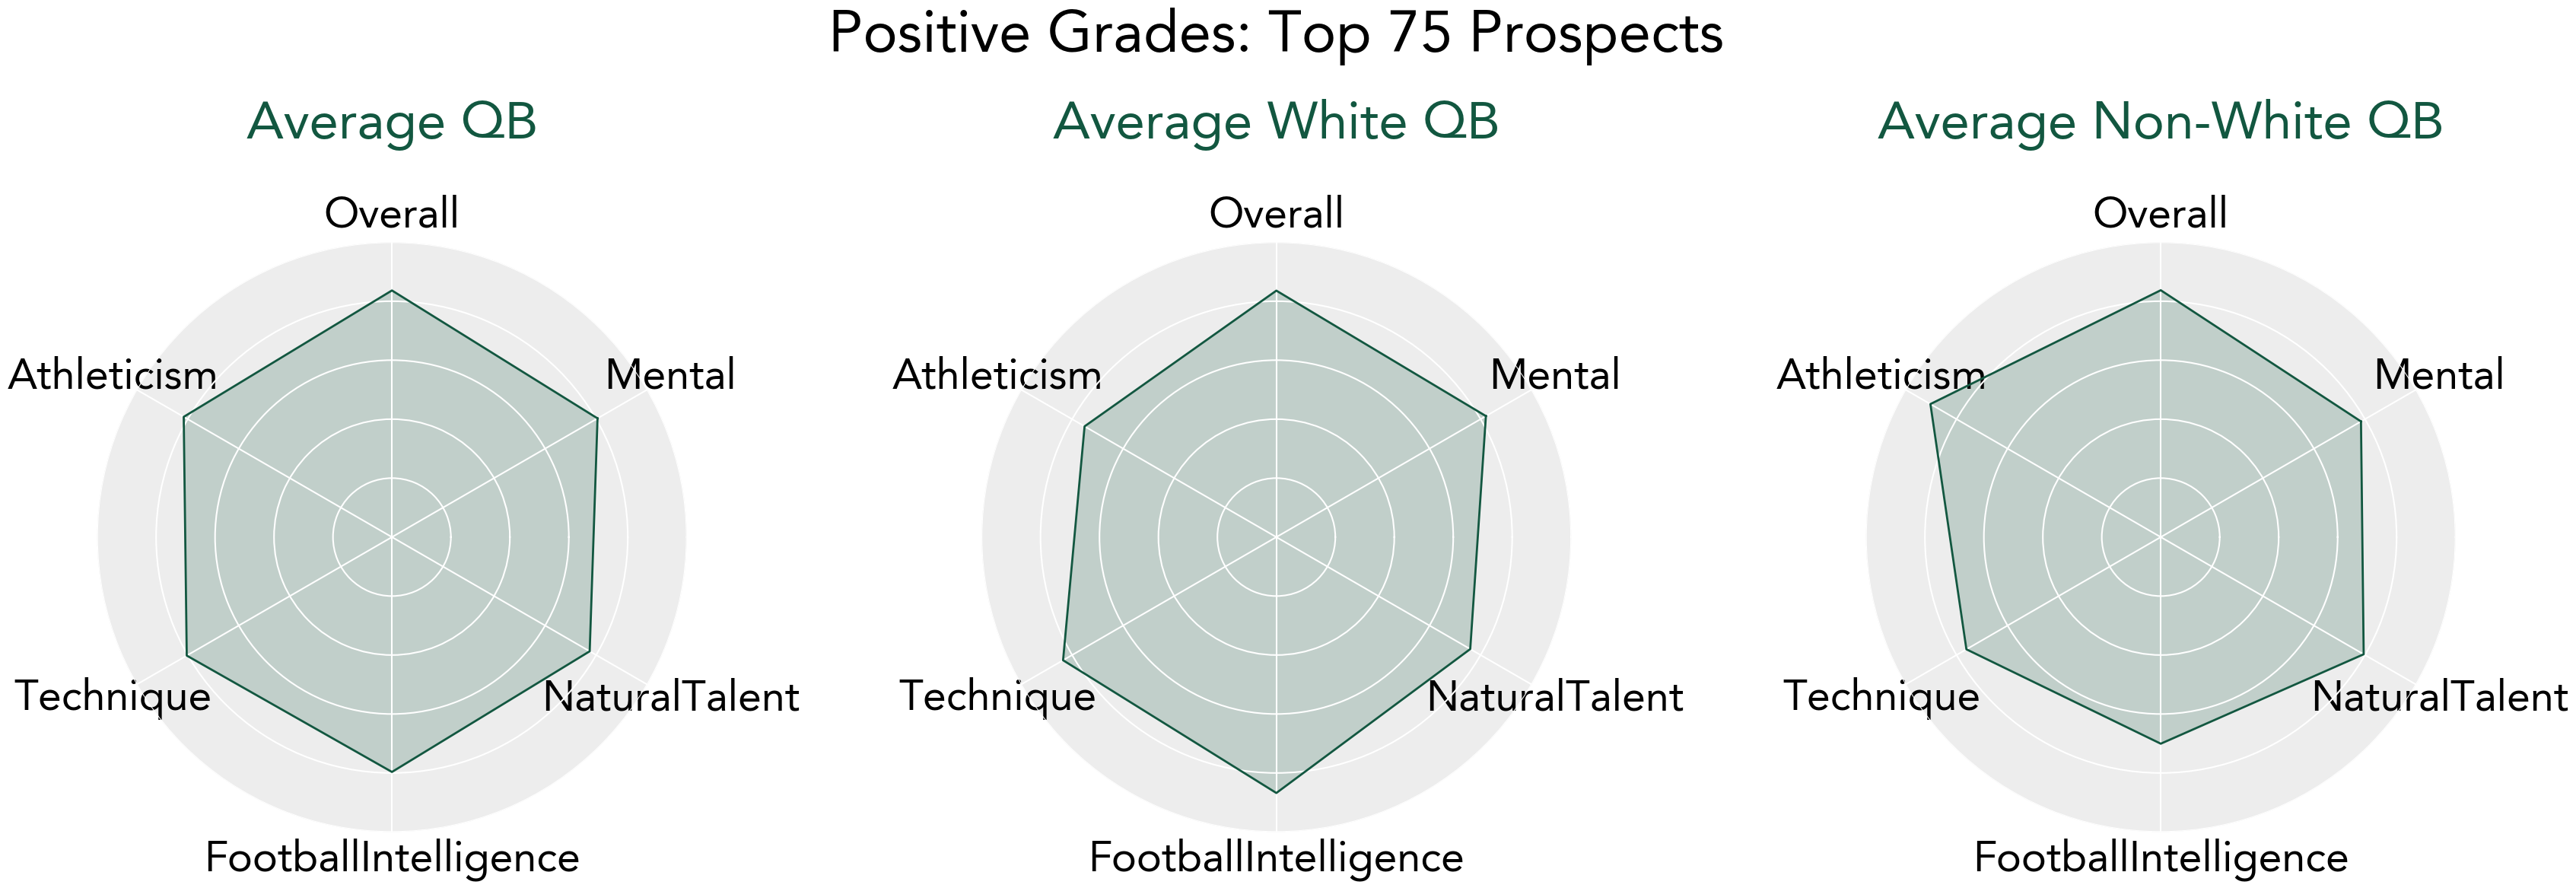

In [15]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_pos, 'Average QB')
w_data = get_row_data(df_pos, 'Average White QB')
nw_data = get_row_data(df_pos, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#125740')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#125740', title='Positive Grades: Top 75 Prospects', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#125740')

plt.show()

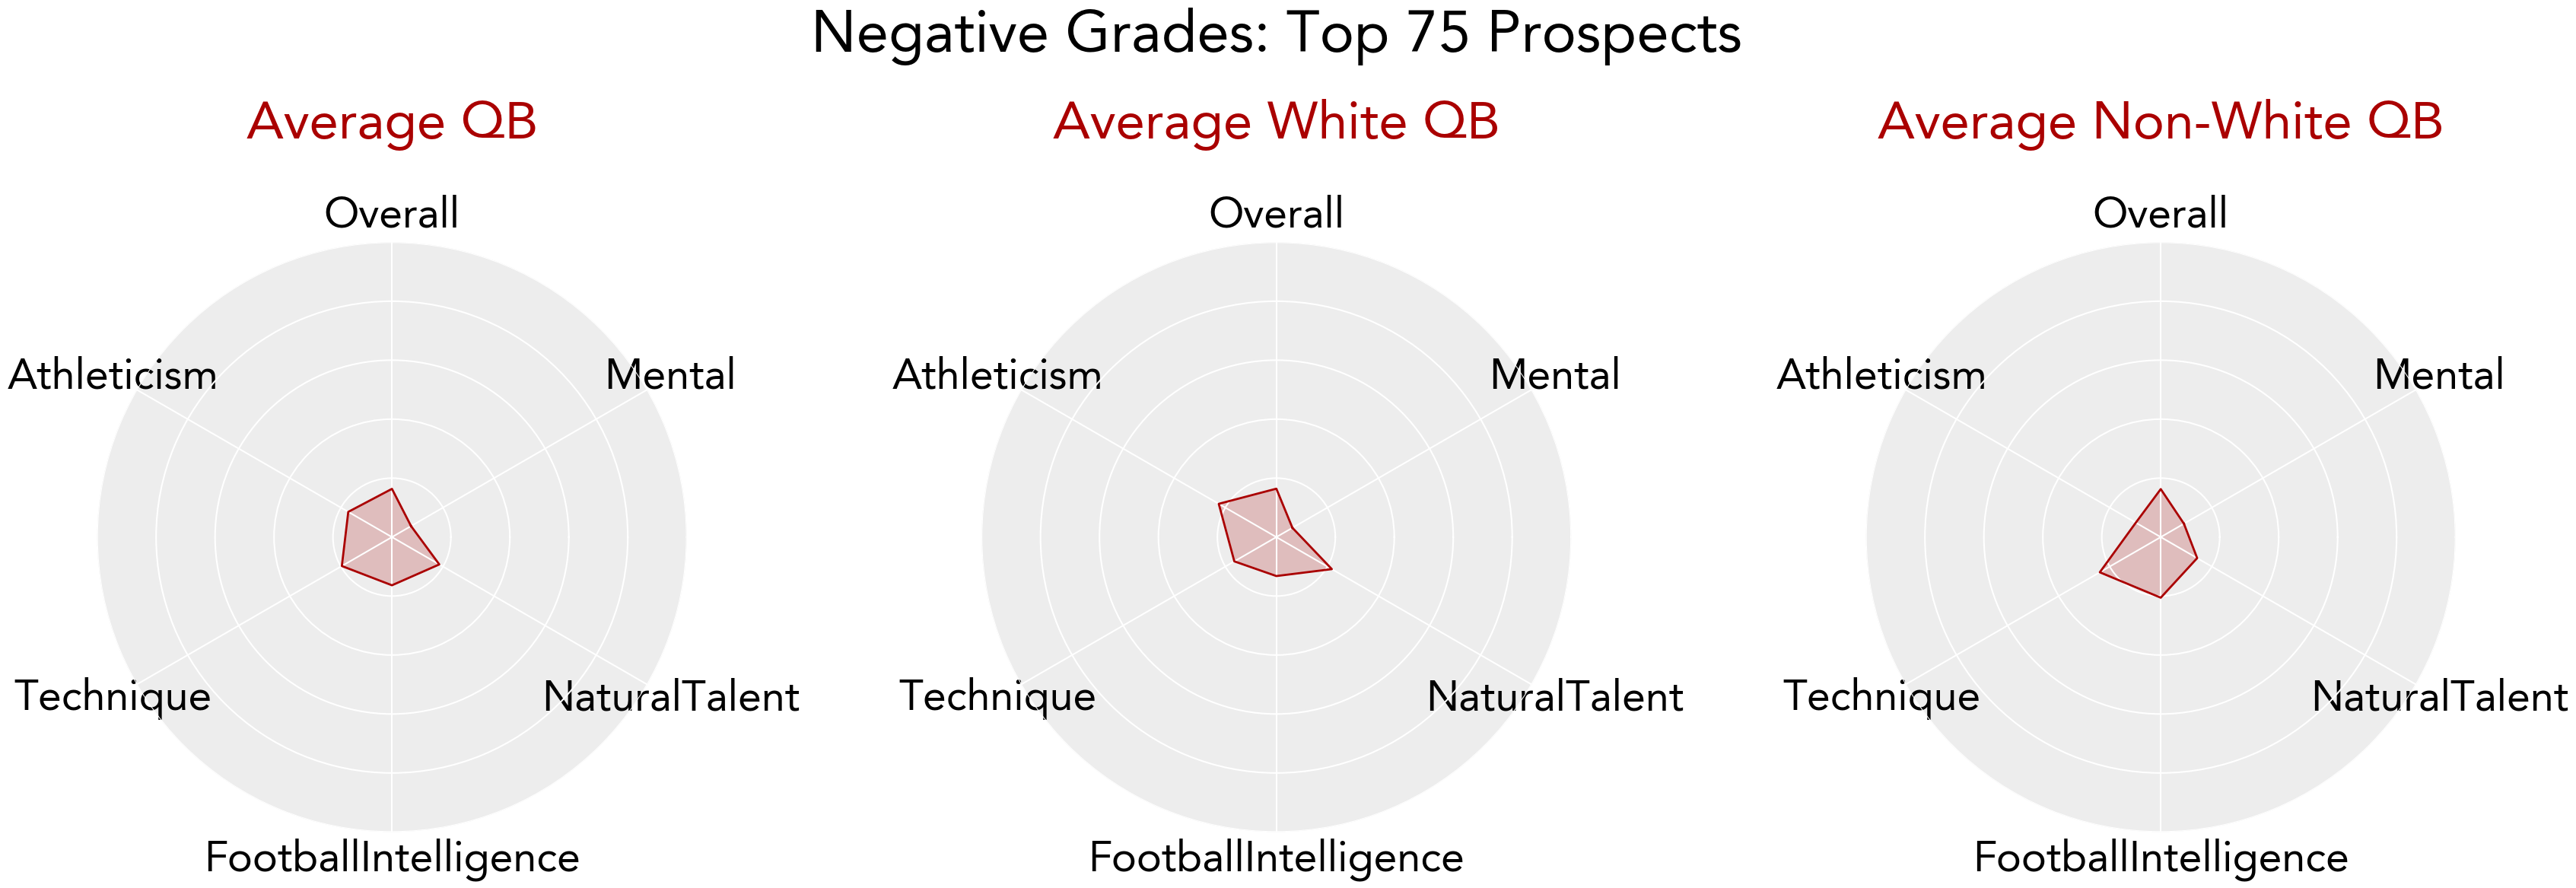

In [16]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_neg, 'Average QB')
w_data = get_row_data(df_neg, 'Average White QB')
nw_data = get_row_data(df_neg, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#aa0000')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#aa0000', title='Negative Grades: Top 75 Prospects', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#aa0000')

plt.show()